In [2]:
#Xu li Methylene blue tu 0.03mM den 0.005mM

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import rotate
from PIL import Image
import scipy.ndimage

filepath = 'D:\DataE\\20190709\\'

In [3]:
#Pre-process Data
fnen = filepath + "nen.jpg"

fnameb1 = filepath + "1.jpg"
fnameb2 = filepath + "2.jpg"
bimg1 = mpimg.imread(fnameb1)
bimg2 = mpimg.imread(fnameb2)

In [9]:
### Parameter
ghxd = 1600 # gioi han x duoi
ghxt = 3700 # gioi han x tren
dd = ghxt - ghxd + 1
dr = 2 # do rong chia 2
y1 = 1356
y2 = 1337
goc34 = 180.5
goc56 = 179.5

In [10]:
#Kenh1 va Kenh2
bxoay1 = rotate(bimg1, goc34)
base_xoay1 = np.dot(bxoay1[...,:3], [299, 587, 114]) #.299 + .587 + .114 

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay1, (y1 - dr + i, ghxd), (y1 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
# ty = np.amax(x, axis = 0)
# tm = np.amax(n, axis = 0)

#np.seterr(divide='ignore', invalid='ignore')
kenh1 = ty

del x

bxoay2 = rotate(bimg2, goc34)
base_xoay2 = np.dot(bxoay2[...,:3], [299, 587, 114]) #.299 + .587 + .114 

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay2, (y2 - dr + i, ghxd), (y2 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
# tm = np.mean(n, axis = 0)
# ty = np.amax(x, axis = 0)
# tm = np.amax(n, axis = 0)

#np.seterr(divide='ignore', invalid='ignore')
kenh2 = ty

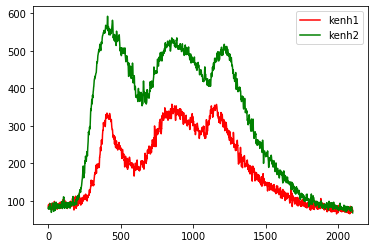

In [11]:
plt.plot(kenh1,'r',label='kenh1')
plt.plot(kenh2,'g',label='kenh2')
plt.legend(loc='upper right')
plt.show()

In [13]:
solieu = np.column_stack((kenh1, kenh2))
filename = 'mb.csv'
df = pd.DataFrame(solieu)
df.to_csv(filepath + filename, index = False)

In [70]:
solieu = np.column_stack((kenh1b, kenh2b, kenh3b, kenh4b, kenh5b, kenh6b))
filename = 'solieucalibrate.csv'
df = pd.DataFrame(solieu)
df.to_csv(filepath + filename, index = False)

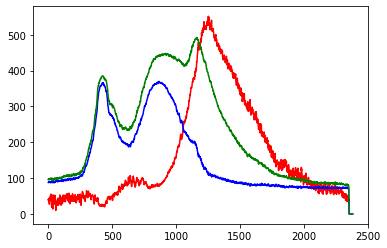

In [73]:
plt.plot(kenh1*1000,'r')
plt.plot(kenh1d,'b')
plt.plot(kenh1b,'g')

plt.show()

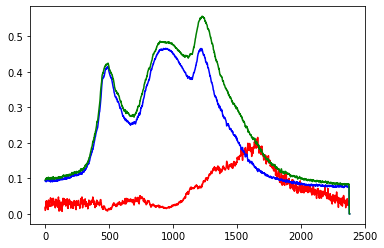

In [72]:
plt.plot(kenh6,'r')
plt.plot(kenh6d/1000,'b')
plt.plot(kenh6b/1000,'g')

plt.show()